## The Customer Cube

<div class="alert alert-block alert-info">
<blockquote>
<i>"The loftier the building, the deeper must the foundation be laid."</i>

<tab>- Thomas A Kempis
</blockquote>
ARR is the concrete for your foundation, then the customer cube is the foundation, and the metrics built on top of your customer cube, are the building.

The entire calculating is just the beginning.
</div>

### What is a Customer Cube?

In it's simplest form, a customer cube is ARR by month by customer by product. 

In terms of a visual, it's a matrix. Months as your column headers, ARR as your values, & everything else nested as your row headers.

| | |2024-01-31|2024-02-29|2024-03-31|2024-04-30|2024-05-31|2024-06-30|2024-07-31|
|---|---|---|---|---|---|---|---|---|
|Customer #1|Product #1|10,000|10,000|10,000|10,000|10,000|10,000|10,000|
|Customer #1|Product #2|8,000|8,000|8,000|8,000|8,000|8,000|8,000|
|Customer #2|Product #1|10,000|10,000|10,000|0|0|0|0|
|Customer #2|Product #2|8,000|8,000|8,000|0|0|0|0|
|Customer #2|Product #3|0|0|0|5,000|5,000|5,000|5,000|
|Customer #2|Product #4|0|0|0|12,000|12,000|12,000|12,000|
|Customer #3|Product #1|10,000|10,000|10,000|10,000|10,000|10,000|10,000|

In practice, this visual is easily presented from a classic star schema fact table in your data model.

|date_key|customer_key|product_key|arr|
|---|---|---|---|
|20240131|1|1|10000|
|20240229|1|1|10000|
|20240331|1|1|10000|
|20240430|1|1|10000|
|20240531|1|1|10000|
|20240630|1|1|10000|
|20240131|1|2|8000|
|20240229|1|2|8000|
|20240331|1|2|8000|
|...|...|...|...|
|20240531|3|1|10000|
|20240630|3|1|10000|

As your cube matures and requirements grow, it's natural for this cube to take on more datapoints and categorizations. Slap a key in the fact table and *build*.

<div class="alert alert-block alert-info">
I'll not be covering star schema. <a href="https://chrisadamson.com/star-schema-complete-reference/">Chris Adamson</a> does a much better job. Adamson lays out the technical, but with a lens of practicality. He conveys how data professionals will be involved in many decisions. These decisions are <i>business decisions</i> with <i>technical implications</i>.

One more time for the back of the room... <i>Business decisions</i> with <i>technical implications</i>. It's likely your data model will have issues, and sometimes, that's okay. These decisions will be made, whether yours or someone elses, to build in a sub-optimal way. You will constantly deal with resource, knowledge, time, cost, and political restraints. So, it's important to know when the technical implication (tech debt) is okay to take on and when it's not.

So, it's a great a thought by Adamson. Not just for data modelling, but for life. We're not perfect and neither is your data model.
</div>


## The Fake Company

To move further I've created a fake company w/ 

In [1]:
print('importing `CONTRACTS`')
from data.build_contracts import CONTRACTS
print(CONTRACTS.dtypes)
CONTRACTS.sample(10)

importing `CONTRACTS`
reading manually added contracts
performing initial sales
performing subsequent renewals
id                              int64
customer                       object
header.amount                   int64
header.start_date      datetime64[ns]
header.end_date        datetime64[ns]
header.booking_date    datetime64[ns]
line.amount                     int64
line.start_date        datetime64[ns]
line.end_date          datetime64[ns]
line.product                   object
line.renewable                   bool
dtype: object


,id,customer,header.amount,header.start_date,header.end_date,header.booking_date,line.amount,line.start_date,line.end_date,line.product,line.renewable
166,282,Oodoo,105500,2024-04-28,2024-07-27,2024-04-28,10000,2024-04-28,2024-07-27,BI,True
1376,107,Yata,75000,2022-06-10,2022-12-09,2022-06-10,12000,2022-06-10,2022-12-09,CPQ,True
673,170,Mycat,48500,2023-10-17,2024-10-16,2023-10-17,6000,2023-10-17,2024-10-16,IAM,True
1257,79,InnoZ,102000,2025-10-23,2027-10-22,2025-10-23,7500,2025-10-23,2027-10-22,DevOps,True
799,142,Dynabox,35000,2025-07-12,2026-07-11,2025-07-12,25000,2025-07-12,2026-07-11,ERP,True
1276,84,Zoomzone,39500,2024-06-26,2025-06-25,2024-06-26,10000,2024-06-26,2025-06-25,CRM,True
129,291,Skyvu,76000,2023-08-15,2025-08-14,2023-08-15,10000,2023-08-15,2025-08-14,VPN,True
359,239,Mydo,46000,2026-01-13,2028-01-12,2026-01-13,12000,2026-01-13,2028-01-12,CPQ,True
212,273,Kamba,57000,2026-11-19,2028-11-18,2026-11-19,5000,2026-11-19,2028-11-18,DMS,True
882,1,Abatz,100000,2024-01-01,2024-12-31,2024-01-01,50000,2024-01-01,2024-12-31,CMS,True


In [2]:
# TODO: Build out the entire ARR overtime w/ each customer, product, and maybe contract
from arr import Contract
Contract.from_df(CONTRACTS[CONTRACTS['id'] == 121])

                          Youspan                           
            Contract #121 - $71,500 - 2025-01-17            
                  2025-01-17 - 2025-04-16                   
************************************************************
product	start date	end date	amount	renewable
************************************************************
VPN	2025-01-17	2025-04-16	$10,000	True
HRIS	2025-01-17	2025-04-16	$13,000	True
CPQ	2025-01-17	2025-04-16	$12,000	True
LMS	2025-01-17	2025-04-16	$13,000	True
IAM	2025-01-17	2025-04-16	$6,000	True
DevOps	2025-01-17	2025-04-16	$7,500	True
BI	2025-01-17	2025-04-16	$10,000	True
************************************************************

In [9]:
from arr import annualize_df
import pandas as pd

df = annualize_df(CONTRACTS)

In [10]:
a: pd.Series = df['ARR'].sum()

<Axes: xlabel='period'>

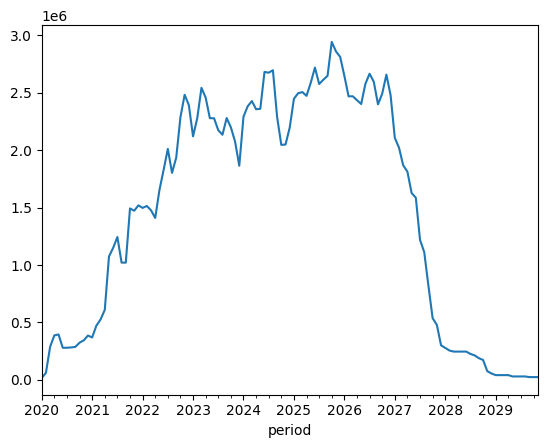

In [12]:
a.plot()